In [4]:
import requests

In [14]:
baseurl = 'https://query1.finance.yahoo.com/v7/finance/download/2018.HK'
b2 = 'https://chart.yahoo.com/table.csv?s=IBM'
s = requests.Session()
s.get(b2, verify=False)
s.status_code
r = requests.get(b2, verify=False)
r.headers


C:\Users\fbuser\Anaconda2\lib\site-packages\requests\packages\urllib3\connectionpool.py:843: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


AttributeError: 'Session' object has no attribute 'status_code'

C:\Users\Aug\Anaconda2\lib\site-packages\requests\packages\urllib3\connectionpool.py:843: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


200
{'Content-Length': '15543', 'Via': 'http/1.1 media-ncache-api12.prod.media.sg3.yahoo.com (ApacheTrafficServer [cMsSf ]), http/1.1 media-router-api7.prod.media.sg3.yahoo.com (ApacheTrafficServer [cMsSf ]), https/1.1 e2.ycpi.hkb.yahoo.com (ApacheTrafficServer [cMsSf ])', 'Content-Disposition': 'attachment; filename=0939.HK.csv', 'X-Content-Type-Options': 'nosniff', 'Content-Encoding': 'gzip', 'Age': '0', 'Strict-Transport-Security': 'max-age=0', 'Server': 'ATS', 'Connection': 'keep-alive', 'Cache-Control': 'no-cache, no-store, private', 'Date': 'Mon, 19 Jun 2017 15:59:26 GMT', 'X-YQL-Host': 'pprd3-node7516-lh1.manhattan.sg3.yahoo.com', 'Content-Type': 'text/csv; charset=utf-8', 'X-Yahoo-Request-Id': '2eqllupckft6u'}
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 820 entries, 2014-01-02 to 2017-04-28
Data columns (total 1 columns):
IBM    820 non-null float64
dtypes: float64(1)
memory usage: 12.8 KB
None


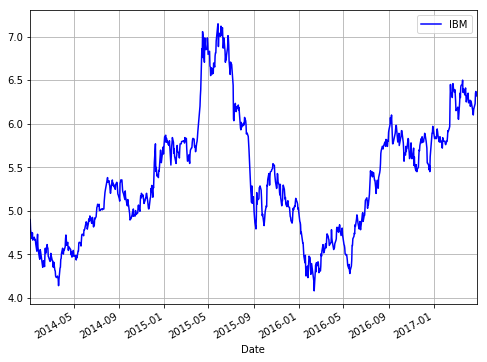

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Fri May 19 2017

@author: vincentqiao
"""

import requests
import time
import pandas as pd
import matplotlib.pyplot as plt

def datetime_timestamp(dt):
     time.strptime(dt, '%Y-%m-%d %H:%M:%S')
     s = time.mktime(time.strptime(dt, '%Y-%m-%d %H:%M:%S'))
     return str(int(s))

s = requests.Session()

#Replace B=xxxx
cookies = dict(B='c650m5hchrhii&b=3&s=tk')

#Replace crumb=yyyy
crumb = 'NMhMTCv7QpM'

begin = datetime_timestamp("2014-01-01 09:00:00")

end = datetime_timestamp("2017-04-30 09:00:00")
stock = '0939.hk'
r = s.get("https://query1.finance.yahoo.com/v7/finance/download/%s?period1=" % stock
          +begin+"&period2="+end+"&interval=1d&events=history&crumb="+crumb,cookies=cookies,verify=False)
print r.status_code
print r.headers
f = open('IBM.csv', 'w')
f.write(r.text)
f.close()    


es = pd.read_csv('IBM.csv', index_col=0,parse_dates=True, sep=",", dayfirst=True)

data = pd.DataFrame({"IBM" : es["Adj Close"][:]}) 

print(data.info())

data.plot(subplots=True, grid=True, style="b", figsize=(8, 6))

plt.show()

In [9]:
# Hello World program in Python
    
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import urllib
import tempfile as tp
import os
import sys
import requests
from datetime import datetime
import time
        
def downloadfile(stock, f = 'sd1t1vml1c1p2k4k5a2'):
  
    baseurl = 'http://finance.yahoo.com/d/quotes.csv?%s'
    stock = ['{:0>4}'.format(x) + '.HK' for x in stock]
    s = '+'.join(stock)
  
    paras = urllib.urlencode({'s': s, 'f': f})
    f = urllib.urlopen(baseurl % paras)
     
    # sd1t1vml1c1p2k4k5a2
    colname = ['symbol', 'date', 'time', 'volume', 
               'daily_rng', 'last_price', 
               'change', 'change_pct', '52wH', '52wH_pct', 'avg_vol']
    data = pd.read_csv(f, names=colname)  
    data = data.set_index(['symbol']) 
    
    f.close()
    print data
    return data 
    # construct multiIndex
    
def getRecord(stock, period=10):
    if period == None:
        period = 10 
    else:
        period = int(period)
    home = os.path.dirname(os.getcwd())
    filename = '{:%Y%m%d-%H%M}'.format(datetime.today()) 

    # dirname = '{:0>4}'.format(stock)
    # for x in stock:
    #     directory = os.join.path(home, x)
    #     if not os.path.exists(directory):
    #         os.makedirs(directory)
    dest = os.path.join(home, 'data', filename)
            
    for x in range(period): 
        data = downloadfile(stock)
        data.to_csv(dest)
        time.sleep(180)
    # store data
def quote():
    home = os.path.dirname(os.getcwd())
    datahome = os.path.join(home, 'data', 'result.csv')
        
        # timestr = datetime.strftime(datetime.now(), '%D%H%M')
        # data.to_csv(os.path.join(datahome, timestr + '.csv'), index=False)
        
    def getStocklist():
        home = os.path.dirname(os.getcwd())
        ls = os.path.join(home, 'data', 'stock_list.xls')
        ls = pd.read_excel(ls)
        return ls
    def a2():
        ls = getStocklist()
        downloadfile(ls[0])
        
        
    ls = getStocklist()
    code = ['1398', '939', '1']
    d = pd.DataFrame()
    for x in range(15):
        code = list(ls['STOCK CODE'][x*100:(x+1)*100])
        data = downloadfile(code)
    #     print data
        d = d.append(data)
    d = d[d['volume'] > 0]
    d.to_csv(datahome)    
    # codeset = list(ls['STOCK CODE'][1500:])
    # downloadfile(codeset)



def histDownload(code):
    code = '{:0>4}.csv'.format(code)
    home = os.path.dirname(os.getcwd())
    datadir = os.path.join(home, 'data', code)
    def datetime_timestamp(dt):
         time.strptime(dt, '%Y-%m-%d %H:%M:%S')
         s = time.mktime(time.strptime(dt, '%Y-%m-%d %H:%M:%S'))
         return str(int(s))

    s = requests.Session()

    #Replace B=xxxx
    cookies = dict(B='c650m5hchrhii&b=3&s=tk')

    #Replace crumb=yyyy
    crumb = 'NMhMTCv7QpM'

    begin = datetime_timestamp("2014-01-01 09:00:00")

    end = datetime_timestamp("2017-04-30 09:00:00")
    
    r = s.get("https://query1.finance.yahoo.com/v7/finance/download/%s?period1=" % code
              +begin+"&period2="+end+"&interval=1d&events=history&crumb="+crumb,cookies=cookies,verify=False)
    
    f = open(datadir, 'w')
    f.write(r.text)
    f.close()

def getStocklist():
    home = os.path.dirname(os.getcwd())
    ls = os.path.join(home, 'data', 'stock_list.xls')
    ls = pd.read_excel(ls)
    return ls

# d = {}
# ls = getStocklist()[0]
# for code in ls['STOCK CODE']:
#     print 'downloading %s \n' % code
#     d['{:0>4}'.format(code)] = histDownload(code)


if __name__ == '__main__':
    # if len(sys.argv) < 2 :
    #     sys.exit()
    #     print len(sys.argv)
    # print len(sys.argv)b
    # arg = sys.argv
    # getRecord(arg[1:-1], arg[-1])
    histDownload(939)


C:\Users\Aug\Anaconda2\lib\site-packages\requests\packages\urllib3\connectionpool.py:843: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [24]:
print datetime.now()
print str(int(time.time()))

2017-06-20 00:17:15.971000
1497889035
